In [1348]:
'''
Calculs d'accord de phase dans cristal de periodically-poled potassium titanyl phosphate (PPKTP)
par Shane Gervais


'''

"\nCalculs d'accord de phase dans cristal de periodically-poled potassium titanyl phosphate (PPKTP)\npar Shane Gervais\n\n\n"

In [1349]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [1350]:
#Coefficient de Sellmeier
AY = 2.19229
BY = 0.83547
CY = 0.04970
DY = 0.01621
AZ = 2.12725
BZ = 1.18431
CZ = 0.0514852
DZ = 0.6603
EZ = 100.00507
FZ = 9.68956e-3

alpha = 6.7e-6
beta = 11e-9

#grating period
T = 9.825e10-6

#celcius
ROOM_TEMP = 25

#longueur d'onde du laser pump
lambda_pump = 0.4045 

#Épaisseur du cristaux
d = 25e-3

#poling period à temp de la pièce
L = 9.825

#nombre d'itterations
N = 1000

#coefficient de polarization
a1_y = [6.2897, 6.3061, -6.0629, 2.6486]
a2_y = [-0.14445, 2.2244, -3.5770, 1.3470]
a1_z = [9.9587, 9.9228, -8.9603, 4.1010]
a2_z = [-1.1882, 10.459, -9.8136, 3.1481]

#début et fin de la somme de les coefficients de pol.
INITIAL = 0
FINAL = 3

#Celcius
temp = np.linspace(35, 90, N)

#borne de la longeur d'onde
RANGE_MIN = 0.802
RANGE_MAX = 0.816

#variation de longueur d'onde du signal
lambda_s = np.linspace(RANGE_MIN, RANGE_MAX, N)

#variation de longueur d'onde du idler
lambda_i = np.linspace(RANGE_MIN, RANGE_MAX, N)

#tolerance de notre approximation
TOLERANCE = 0.005

In [1351]:
n_p_1 = 0
n_p_2 = 0

for m in range(INITIAL, FINAL+1):
    n_p_1 = n_p_1 + ((a1_y[m]*10**-6))/(lambda_pump**(m))
    n_p_2 = n_p_2 + ((a2_y[m]*10**-8))/(lambda_pump**(m))

#vue que le pump est associée avec une polarization dans la dim. y
#basé sur l'équation de Sellmeier à la température de la pièce
n_p_y = np.sqrt(AY + (BY/(1-(CY/(lambda_pump**2)))) - DY*lambda_pump**2)

print("np_y =",n_p_y)
print("np_1 =", n_p_1)
print("np_2 =", n_p_2)

np_y = 1.8410861752124836
np_1 = 2.484335876533928e-05
np_2 = 3.845318276349009e-08


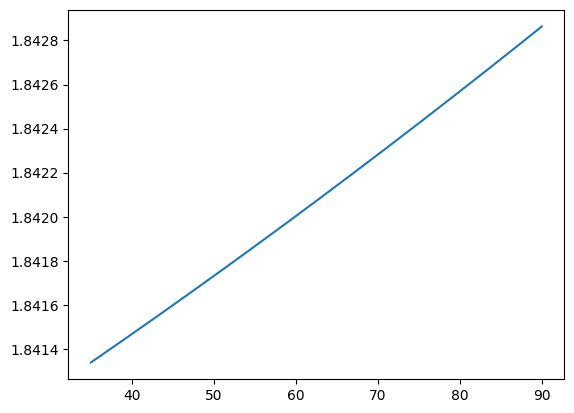

In [1352]:
n_p = (n_p_1)*(temp - ROOM_TEMP) + n_p_2*(temp - ROOM_TEMP)**2 + n_p_y

plt.plot(temp, n_p)
plt.show()

In [1353]:
n_s_1 = 0
n_s_2 = 0
n_s_y = []

for m in range(INITIAL, FINAL+1):
    n_s_1 = n_s_1 + ((a1_y[m]*10**-6))/(lambda_s[m]**(m))
    n_s_2 = n_s_2 + ((a2_y[m]*10**-8))/(lambda_s[m]**(m))

for m in range(len(lambda_s)):
    n_s_yy = np.sqrt(AY + (BY/(1-(CY/(lambda_s[m]**2)))) - DY*lambda_s[m]**2)

    n_s_y.append(n_s_yy)
    

print("np_1 =", n_s_1)
print("np_2 =", n_s_2)

np_1 = 9.860731941620073e-06
np_2 = -3.209497630748377e-09


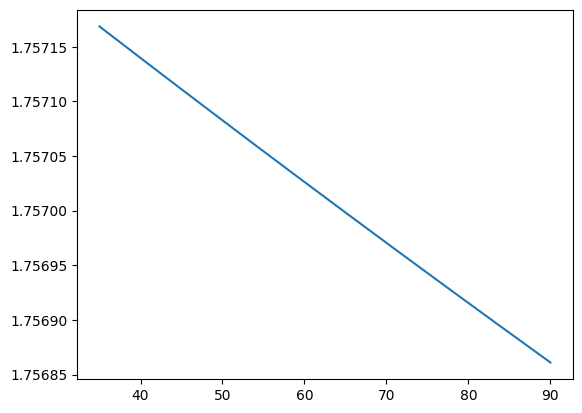

In [1354]:
n_s = (n_s_1)*(temp - ROOM_TEMP) + n_s_2*(temp - ROOM_TEMP)**2 + n_s_y

plt.plot(temp, n_s)
plt.show()

In [1355]:
n_i_1 = 0
n_i_2 = 0
n_i_z = []


for m in range(INITIAL, FINAL+1):
    n_i_1 = n_i_1 + ((a1_z[m]*10**-6))/(lambda_i[m]**(m))
    n_i_2 = n_i_2 + ((a2_z[m]*10**-8))/(lambda_i[m]**(m))
    
for m in range(len(lambda_i)):
    n_i_zz = np.sqrt(AZ + (BZ/(1 - (CZ/(lambda_i[m]**2)))) + (DZ/(1 - (EZ/(lambda_i[m]**2)))) - FZ*lambda_i[m]**2)

    n_i_z.append(n_i_zz)

print("ni_1 =", n_i_1)
print("ni_2 =", n_i_2)


ni_1 = 1.635003936704979e-05
ni_2 = 2.6982058558451623e-08


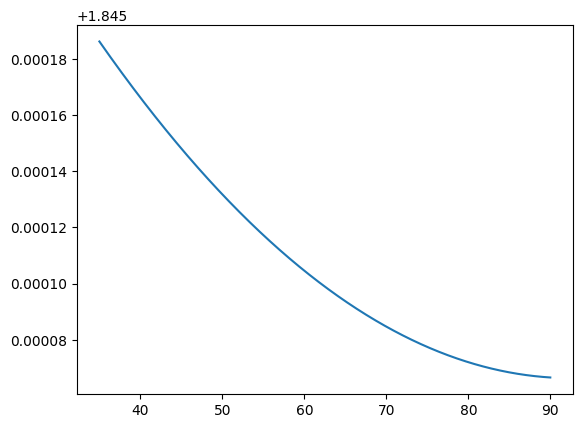

In [1356]:
n_i = (n_i_1)*(temp - ROOM_TEMP) + n_i_2*(temp - ROOM_TEMP)**2 + n_i_z

plt.plot(temp, n_i)
plt.show()

In [1357]:
poling_period = []

for t in range(len(temp)):
    pp = L*(1 + alpha*(temp[t] - ROOM_TEMP) + beta*(temp[t] - ROOM_TEMP)**2)
    poling_period.append(pp)

In [1358]:
#trouver les longueurs d'ondes accepter par l'équation du bas
zero_vec = []
array_list = []
temp_list = []
for t in range(len(temp)):
    #cet équation, trouve lambda qui accept que ceci est 0
    zero = n_p[t]/lambda_pump - n_s[t]/lambda_pump + (n_s[t] - n_i[t])/lambda_i[t] - 1/poling_period[t]
    
    #check si ces approx à 0
    if (math.isclose(0, zero, abs_tol=TOLERANCE)):
        zero_vec.append(zero)
        array_list.append(t)
        temp_list.append(temp[t])


print(len(zero_vec))
print(len(temp_list))

1000
1000


In [1359]:
accept_lam_i = []
accept_lam_s = []
for a in range(len(array_list)):
    lam_i = lambda_i[array_list[a]]
    accept_lam_i.append(lam_i)

    lam_s = 1/((1/lambda_pump) - (1/accept_lam_i[a]))
    accept_lam_s.append(lam_s)


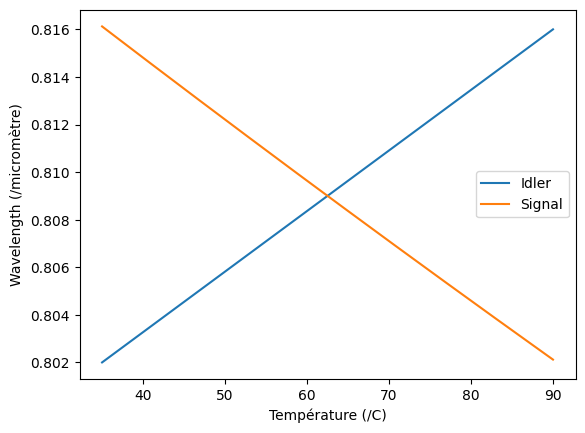

In [1360]:
plt.plot(temp_list, accept_lam_i, label="Idler")
plt.plot(temp_list, accept_lam_s, label="Signal")
plt.xlabel("Température (/C)")
plt.ylabel("Wavelength (/micromètre)")
plt.legend()

In [1361]:
#dégénérée de la fluorescence paramétrique

lambda_pareil = 0.809

n_p_1 = 0
n_p_2 = 0
n_p_y = []

#nanometre
DEG_MIN = 0.350
DEG_MAX = 0.5

lambda_p = np.linspace(DEG_MIN, DEG_MAX, N)

for m in range(INITIAL, FINAL+1):
    n_p_1 = n_p_1 + ((a1_y[m]*10**-6))/(lambda_p[m]**(m))
    n_p_2 = n_p_2 + ((a2_y[m]*10**-8))/(lambda_p[m]**(m))

for m in range(len(lambda_p)):
    n_p_yy = np.sqrt(AY + (BY/(1-(CY/(lambda_s[m]**2)))) - DY*lambda_s[m]**2)
    n_p_y.append(n_p_yy)

In [1362]:
n_s_1 = 0
n_s_2 = 0
n_s_y = []

for m in range(INITIAL, FINAL+1):
    n_s_1 = n_s_1 + ((a1_y[m]*10**-6))/(lambda_pareil**(m))
    n_s_2 = n_s_2 + ((a2_y[m]*10**-8))/(lambda_pareil**(m))

n_s_y = np.sqrt(AY + (BY/(1-(CY/(lambda_pareil**2)))) - DY*lambda_pareil**2)

In [1363]:
n_i_1 = 0
n_i_2 = 0
n_i_z = []


for m in range(INITIAL, FINAL+1):
    n_i_1 = n_i_1 + ((a1_z[m]*10**-6))/(lambda_i[m]**(m))
    n_i_2 = n_i_2 + ((a2_z[m]*10**-8))/(lambda_i[m]**(m))
    

n_i_z = np.sqrt(AZ + (BZ/(1 - (CZ/(lambda_pareil**2)))) + (DZ/(1 - (EZ/(lambda_pareil**2)))) - FZ*lambda_pareil**2)


print("ni_1 =", n_i_1)
print("ni_2 =", n_i_2)

ni_1 = 1.635003936704979e-05
ni_2 = 2.6982058558451623e-08


In [1364]:
n_p = (n_p_1)*(temp - ROOM_TEMP) + n_p_2*(temp - ROOM_TEMP)**2 + n_p_y
n_s = (n_s_1)*(temp - ROOM_TEMP) + n_s_2*(temp - ROOM_TEMP)**2 + n_s_y
n_i = (n_i_1)*(temp - ROOM_TEMP) + n_i_2*(temp - ROOM_TEMP)**2 + n_i_z



In [1365]:
#trouver les longueurs d'ondes accepter par l'équation du bas
zero_vec = []
array_list = []
temp_list = []
for t in range(len(temp)):
    #cet équation, trouve lambda qui accept que ceci est 0
    zero = n_p[t]/lambda_p[t] - n_s[t]/lambda_p[t] + (n_s[t] - n_i[t])/lambda_pareil - 1/poling_period[t]
    
    #check si ces approx à 0
    if (math.isclose(0, zero, abs_tol=0.3)):
        zero_vec.append(zero)
        array_list.append(t)
        temp_list.append(temp[t])


print(len(zero_vec))
print(len(temp_list))

1000
1000


In [1366]:
accept_lam_0 = []
for a in range(len(array_list)):
    lam_0 = lambda_i[array_list[a]]
    accept_lam_0.append(lam_0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


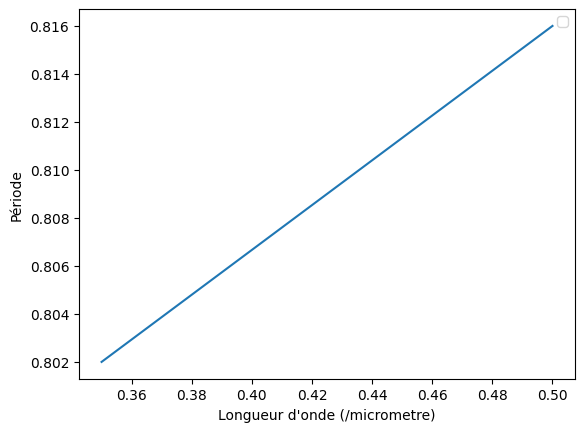

In [1367]:
plt.plot(lambda_p, accept_lam_0)
plt.xlabel("Longueur d'onde (/micrometre)")
plt.ylabel("Période")
plt.legend()